In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("PremierLeagueSeason2024.csv")
df.sample(5, random_state=44)

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
18,Southampton,47,68,12,7,19,43,-21,19
2,Arsenal,146,68,46,12,18,150,78,3
11,Wolverhampton Wanderers,86,117,25,16,35,91,-31,12
1,Liverpool,154,83,44,19,13,151,71,2
4,Chelsea,135,99,37,19,20,130,36,5


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team             24 non-null     object
 1   goals_scored     24 non-null     int64 
 2   goals_conceded   24 non-null     int64 
 3   wins             24 non-null     int64 
 4   draws            24 non-null     int64 
 5   losses           24 non-null     int64 
 6   points           24 non-null     int64 
 7   goal_difference  24 non-null     int64 
 8   rank             24 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ KB


In [103]:
df = df.dropna()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team             24 non-null     object
 1   goals_scored     24 non-null     int64 
 2   goals_conceded   24 non-null     int64 
 3   wins             24 non-null     int64 
 4   draws            24 non-null     int64 
 5   losses           24 non-null     int64 
 6   points           24 non-null     int64 
 7   goal_difference  24 non-null     int64 
 8   rank             24 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ KB


In [105]:
dataArr = ["goals_scored", "goals_conceded", "wins"]
X = df[dataArr]
y = df["team"] ## was "rank"

In [106]:
print(X)

    goals_scored  goals_conceded  wins
0            179              66    55
1            154              83    44
2            146              68    46
3            130             102    39
4            135              99    37
5            142             106    38
6            131             107    36
7            122             121    33
8             87              99    30
9            131             124    30
10            98             124    25
11            86             117    25
12            95             108    21
13            82             114    18
14            68              50    20
15            74             133    15
16            62              54    18
17            54              67    13
18            47              68    12
19            56              65    10
20            55             167    10
21            49              67     9
22            52              85     6
23            35              76     5


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=44)

rfModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=44)

In [108]:
rfModel.classes_

array(['Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Crystal Palace', 'Everton',
       'Fulham', 'Luton Town', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Nottingham Forest', 'Sheffield United',
       'West Bromwich Albion', 'West Ham United'], dtype=object)

In [109]:
rfModel.feature_importances_

array([0.36828047, 0.36192664, 0.26979289])

In [110]:
important = rfModel.feature_importances_
cols = X.columns
i = 0

In [111]:
while i<len(cols):
    print(f"the importance of feature  '{cols[i]}' is {round(important[i] * 100, 2)}%. ")
    i+=1

the importance of feature  'goals_scored' is 36.83%. 
the importance of feature  'goals_conceded' is 36.19%. 
the importance of feature  'wins' is 26.98%. 


In [112]:
checkData = [[50, 25, 5]]
rfModel.predict(checkData)

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Nottingham Forest'], dtype=object)

In [113]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

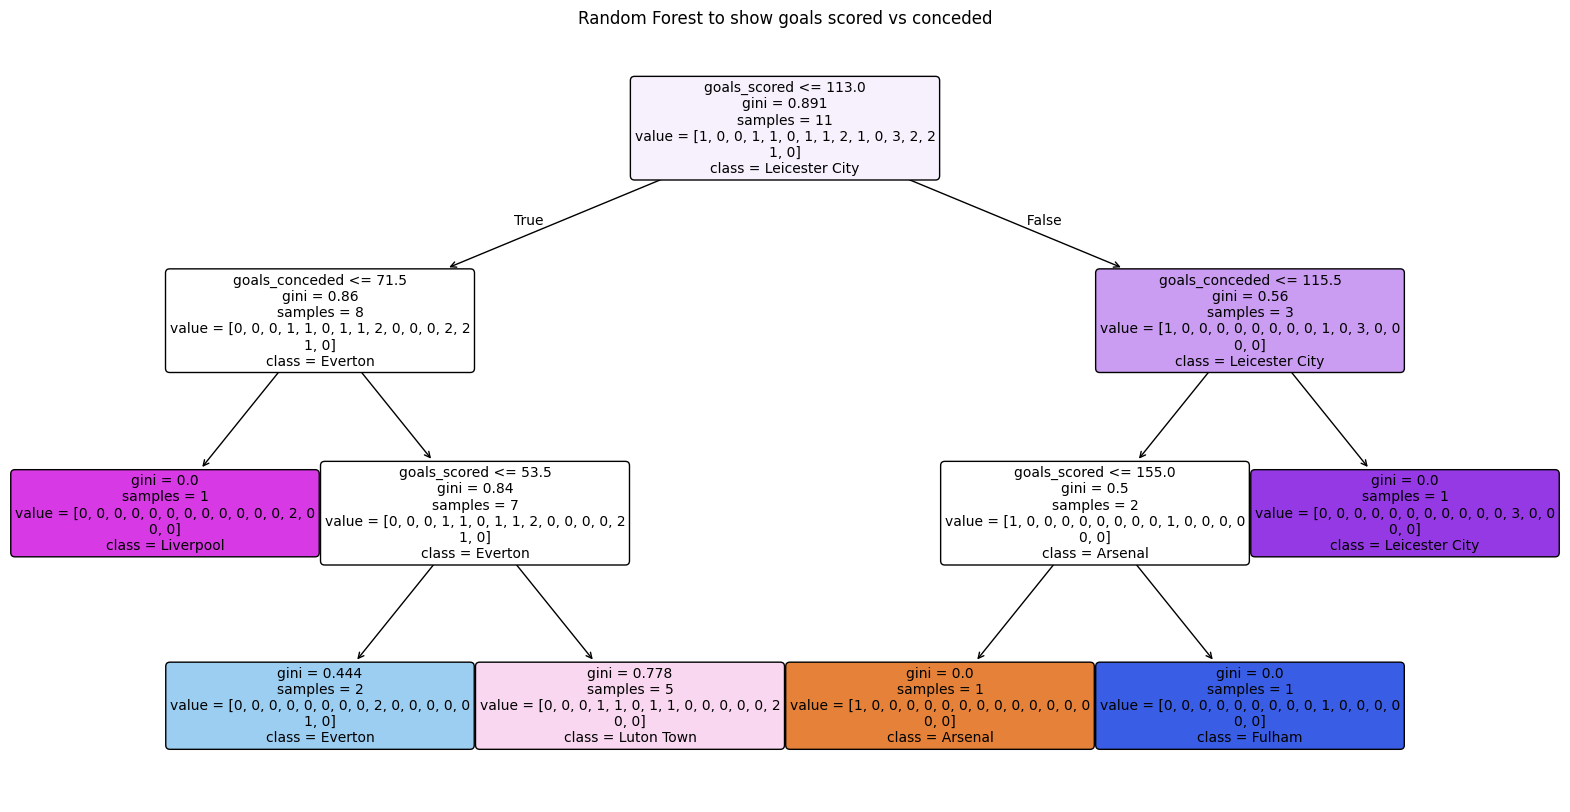

In [114]:
tree = rfModel.estimators_[0]
plt.figure(figsize=(20,10))  # Set figure size to make the tree more readable

plot_tree(tree, 
          feature_names=dataArr,  # Use the feature names from the dataset
          class_names=[str(c) for c in sorted(y.unique())], # Use class names (species names)
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes

plt.title("Random Forest to show goals scored vs conceded")
plt.show()